# Tutorial

In [ ]:
https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5

In [ ]:
# !pip install -U torch torchvision
# !pip install git+https://github.com/facebookresearch/fvcore.git
# !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
# !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
# !pip install -e detectron2_repo

# Data

In [1]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
# datasets' unique names to register

data_path = '/data_science/data_science/data/v1/idcard/segmentation/idcard_coco_segmentation'
train_name ="idcard_train"
test_name = "idcard_valid"

image_root = f"{data_path}/images"
train_instances = f"{data_path}/train/_annotations.coco.json"
test_instances = f"{data_path}/valid/_annotations.coco.json"

In [2]:
register_coco_instances(train_name, {}, train_instances, image_root)
register_coco_instances(test_name, {}, test_instances, image_root)

meta_train = MetadataCatalog.get(train_name)
data_train = DatasetCatalog.get(train_name)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



# Train

In [3]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

In [4]:
# set hyper parameters
cfg = get_cfg()

cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file("detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (train_name,)
cfg.DATASETS.TEST = (test_name,)  

# cfg.MODEL.WEIGHTS = get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.DATALOADER.NUM_WORKERS = 5
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.CHECKPOINT_PERIOD = 1000
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 16
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.OUTPUT_DIR = "weights/resnext101"
cfg.INPUT.MASK_FORMAT = 'bitmask'

# training
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/06 02:59:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

WARNING [06/06 02:59:48 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 02:59:48 d2.data.datasets.coco]: Loaded 193 images in COCO format from /data_science/data_science/data/v1/idcard/segmentation/idcard_coco_segmentation/train/_annotations.coco.json
[06/06 02:59:48 d2.data.build]: Removed 0 images with no usable annotations. 193 images left.
[06/06 02:59:48 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    ewe     | 0            |   idcard   | 193          |
|            |              |            |              |
|   total    | 193          |            |              |
[06/06 02:59:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip(

2022-06-06 02:59:48.928827: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-06 02:59:48.928892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[06/06 02:59:51 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[06/06 02:59:51 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up:
| Names in Model    | Names in Checkpoint                         | Shapes                                          |
|:------------------|:--------------------------------------------|:------------------------------------------------|
| res2.0.conv1.*    | res2_0_branch2a_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| res2.0.conv2.*    | res2_0_branch2b_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| res2.0.conv3.*    | res2_0_branch2c_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,256,1,1)       |
| res2.0.shortcut.* | res2_0_branch1_{bn_b,bn_rm,bn_riv,bn_s,w}   | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| res2.1.conv1.*    | res2_1_branch2a_{bn_b,bn_rm,bn_riv,bn_s,w}  | (256,) (256,) (256,) (256,) (256,2

Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
The checkpoint state_dict contains 

[06/06 02:59:51 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/06 03:05:42 d2.utils.events]:  eta: 4:39:05  iter: 19  total_loss: 2.309  loss_cls: 0.9165  loss_box_reg: 0.003594  loss_mask: 0.6929  loss_rpn_cls: 0.6841  loss_rpn_loc: 0.00873  time: 17.0616  data_time: 0.0172  lr: 1.9981e-06  
[06/06 03:10:53 d2.engine.hooks]: Overall training speed: 35 iterations in 0:10:17 (17.6430 s / it)
[06/06 03:10:53 d2.engine.hooks]: Total training time: 0:10:17 (0:00:00 on hooks)
[06/06 03:10:53 d2.utils.events]:  eta: 4:37:33  iter: 37  total_loss: 2.18  loss_cls: 0.7901  loss_box_reg: 0.003378  loss_mask: 0.6916  loss_rpn_cls: 0.6829  loss_rpn_loc: 0.008167  time: 17.0995  data_time: 0.0091  lr: 3.6964e-06  


KeyboardInterrupt: 

# Test

In [7]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.model_zoo import *

# set config
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file("detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (train_name,)
cfg.DATASETS.TEST = (test_name,)   
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.CHECKPOINT_PERIOD = 1000
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 5000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 16
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.OUTPUT_DIR = "weights/resnext101"
cfg.INPUT.MASK_FORMAT = 'bitmask'
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = os.path.join(data_path, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2

In [9]:
from detectron2.engine import DefaultPredictor

predictor = DefaultPredictor(cfg)

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator(test_name, cfg, False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, test_name)
inference_on_dataset(trainer.model, test_loader, evaluator)

[06/06 03:14:49 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

WARNING [06/06 03:14:49 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 03:14:49 d2.data.datasets.coco]: Loaded 8 images in COCO format from /data_science/data_science/data/v1/idcard/segmentation/idcard_coco_segmentation/valid/_annotations.coco.json
WARNING [06/06 03:14:49 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [06/06 03:14:49 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 03:14:49 d2.data.datasets.coco]: Loaded 8 images in COCO format from /data_science/data_science/data/v1/idcard/segmentation/idcard_coco_segmentation/valid/_annotations.coco.json
[06/06 03:14:49 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-

OrderedDict([('bbox',
              {'AP': 0.0,
               'AP50': 0.0,
               'AP75': 0.0,
               'APs': nan,
               'APm': nan,
               'APl': 0.0,
               'AP-ewe': nan,
               'AP-idcard': 0.0}),
             ('segm',
              {'AP': 0.0,
               'AP50': 0.0,
               'AP75': 0.0,
               'APs': nan,
               'APm': nan,
               'APl': 0.0,
               'AP-ewe': nan,
               'AP-idcard': 0.0})])

In [12]:
import cv2
img = cv2.imread(f"{image_root}/ebf7b806-6909884425988026369_2022_03_21_jpg.rf.c0f3fb5df0844a2d32ffe20a5070132d.jpg")
outputs = predictor(img)
outputs

{'instances': Instances(num_instances=2, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 18.6075, 100.0754, 605.3514, 482.4917],
         [ 35.5110,  94.6568, 298.5677, 479.4341]])), scores: tensor([0.9987, 0.2097]), pred_classes: tensor([1, 1]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, F

# Display predict label

WARNING [06/06 06:48:30 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 06:48:30 d2.data.datasets.coco]: Loaded 8 images in COCO format from /data_science/data_science/data/v1/idcard/segmentation/idcard_coco_segmentation/valid/_annotations.coco.json


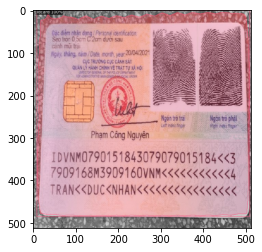

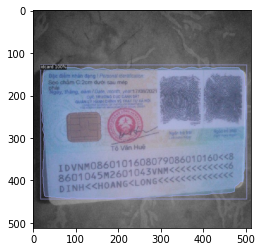

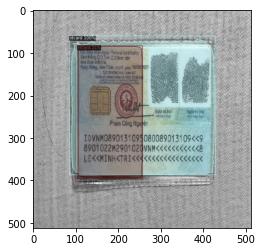

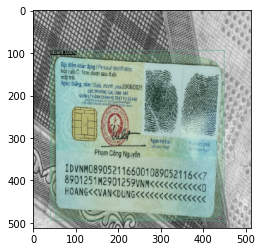

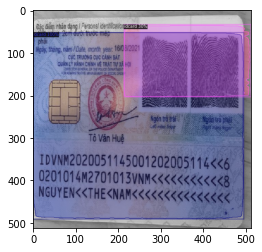

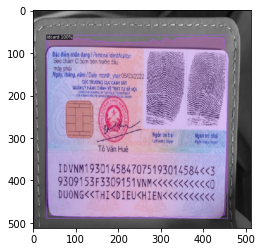

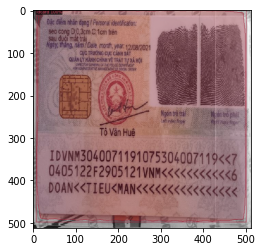

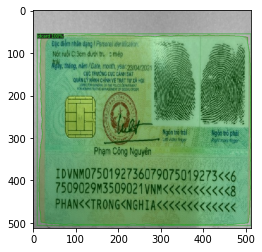

In [69]:
import random
from detectron2.utils.visualizer import Visualizer

from detectron2.utils.visualizer import ColorMode
import matplotlib.pyplot as plt
%matplotlib inline

meta_test = MetadataCatalog.get(test_name)
data_test = DatasetCatalog.get(test_name)

random.seed(10)
for d in random.sample(data_test, 8):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=meta_test, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

# Display true label

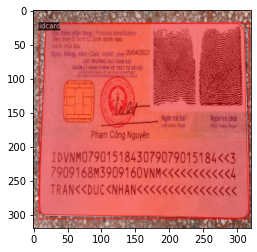

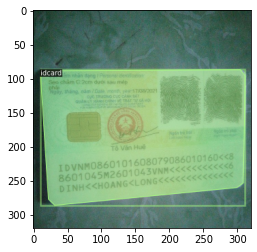

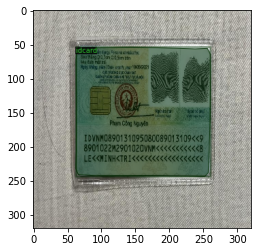

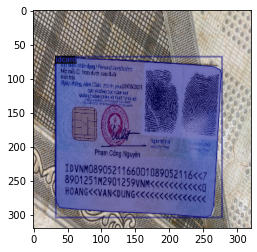

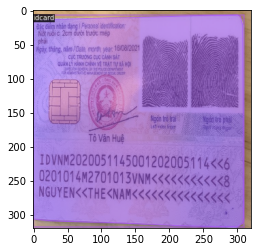

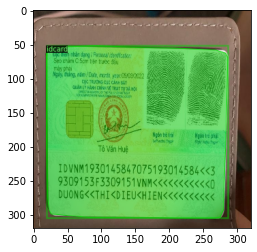

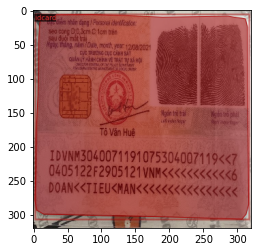

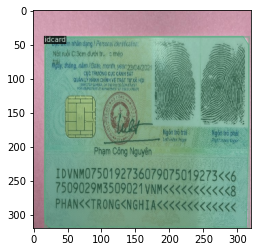

In [68]:
import random
from detectron2.utils.visualizer import Visualizer
import cv2
from PIL import Image

random.seed(10)
for d in random.sample(data_test, 8):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=meta_test, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(cv2.cvtColor(vis.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [27]:
import numpy as np

# === Extract (only) the mask and box of Hobbes === #
# Find the index of the class we are interested in
# First, convert to numpy array to allow direct indexing
class_ids = np.array(outputs["instances"].pred_classes.cpu())
class_index = np.where(class_ids == 1)  # Find index where class ID is 16
# Use that index to index the array of masks and boxes
mask_tensor = outputs["instances"].pred_masks[class_index]
print(mask_tensor.shape)
mask_tensor

torch.Size([1, 640, 640])


tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

In [28]:
# Convert tensor to numpy array
# hobbes_mask = mask_tensor.cpu()
hobbes_mask = mask_tensor
print("Before:", type(hobbes_mask))
print(hobbes_mask.shape)
hobbes_mask = np.array(hobbes_mask[0])
print("After:", type(hobbes_mask))
print(hobbes_mask.shape)

Before: <class 'torch.Tensor'>
torch.Size([1, 640, 640])
After: <class 'numpy.ndarray'>
(640, 640)


In [29]:
hobbes_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
# Create blank black background
# The "True" pixels will be converted to white and copied onto the black background
background = np.zeros(hobbes_mask.shape)
background.shape

(640, 640)

In [31]:
# Add white pixels where mask values are True
bin_mask = np.where(hobbes_mask, 255, background).astype(np.uint8)
print(bin_mask.shape)
bin_mask

(640, 640)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

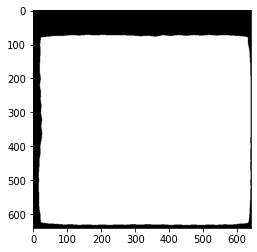

In [67]:
# Show the resulting binary mask
plt.imshow(cv2.cvtColor(bin_mask, cv2.COLOR_BGR2RGB))
# cv2.imwrite("./hong_origin.jpg", img)

BG shape: (640, 640, 3)
Mask shape: (640, 640, 3)


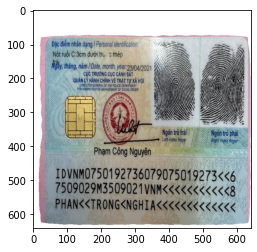

In [89]:
# === Extract pixels using mask === #

# Create blank background
# bg = np.zeros(img.shape)
bg = np.ones(img.shape)*255
print("BG shape:", bg.shape)

# Create mask
mask = np.stack([hobbes_mask, hobbes_mask, hobbes_mask], axis=2)
print("Mask shape:", mask.shape)

# Copy color pixels from the original color image where mask is set
foreground = np.where(mask, img, bg).astype(np.uint8)

# Check out the result
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))

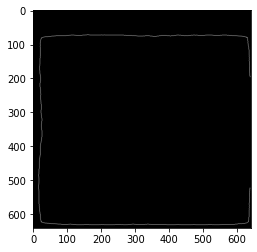

In [95]:
def canny_edge_detection(img, blur_ksize=5, threshold1=100, threshold2=200):
    """
    image_path: link to image
    blur_ksize: Gaussian kernel size
    threshold1: min threshold 
    threshold2: max threshold
    """
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img,(blur_ksize,blur_ksize),0)

    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)

    return img_canny
    
img_canny = canny_edge_detection(bin_mask, 25, 50, 100)

plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB))

637.0 522.0
629.0 83.0
24.0 622.0
629.0 622.0


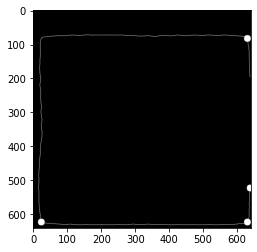

In [96]:
corners = cv2.goodFeaturesToTrack(img_canny,4,0.01,100,blockSize = 3)

for corner in corners:
    x,y = corner.ravel()
    print(x, y)
    cv2.circle(img_canny,(int(x),int(y)), 10, (255,255,255), -1)
    
plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB))